# Data Exploration

This notebook explores the datasets to understand:
- Data distributions
- Missing values
- Relationships between variables
- Historical yield patterns


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up paths
data_dir = Path("../raw_datasets")
output_dir = Path("../models")
output_dir.mkdir(exist_ok=True)

# Load datasets
print("Loading datasets...")
climate_df = pd.read_csv(data_dir / "climate_data.csv")
crop_climate_req = pd.read_csv(data_dir / "crop_climate_requirements.csv")
crop_requirements = pd.read_csv(data_dir / "crop_requirements.csv")
crop_npk_req = pd.read_csv(data_dir / "crop_npk_level_requirements.csv")
historical_perf = pd.read_csv(data_dir / "historical_crop_performance.csv")
soil_test_df = pd.read_csv(data_dir / "soil_test_data.csv")

print(f"Climate data: {len(climate_df)} records")
print(f"Crop climate requirements: {len(crop_climate_req)} crops")
print(f"Crop requirements: {len(crop_requirements)} crops")
print(f"NPK requirements: {len(crop_npk_req)} crops")
print(f"Historical performance: {len(historical_perf)} records")
print(f"Soil test data: {len(soil_test_df)} records")


Loading datasets...
Climate data: 215556 records
Crop climate requirements: 117 crops
Crop requirements: 117 crops
NPK requirements: 117 crops
Historical performance: 94830 records
Soil test data: 22242 records


In [7]:
historical_perf['Crop'].unique()

array(['Alugbati', 'Ampalaya', 'Arrowroot', 'Asparagus', 'Atis',
       'Avocado', 'Balimbing', 'Banana', 'Basil', 'Beets', 'Black beans',
       'Breadfruit', 'Broccoli', 'Cabbage', 'Calamansi', 'Camatchili',
       'Camote', 'Carrot', 'Cassava', 'Cauliflower', 'Celery',
       'Chayote fruit', 'Chico', 'Chili', 'Chinese cabbage (Wongbok',
       'Chives', 'Pea', 'Cucumber', 'Corn', 'Dragon Fruit', 'Duhat',
       'Durian', 'Eggplant', 'Gabi', 'Garlic leeks', 'Garlic', 'Ginger',
       'Melon', 'Guava', 'Guyabano', 'Jackfruit', 'Kamansi', 'Kamias',
       'Kangkong', 'Kidney beans', 'Lanzones', 'Lettuce', 'Luyang dilaw',
       'Mango', 'Marang', 'Pineapple', 'Mongo', 'Mustard', 'Okra',
       'Onion', 'Oregano', 'Paminta', 'Pandan', 'Papaya', 'Papay',
       'Parsley', 'Passion Fruit', 'Patani', 'Patola', 'Peanut', 'Pechay',
       'Pepper', 'Pomelo', 'Potato', 'Radish', 'Radish pods', 'Rambutan',
       'Rice', 'Saluyot', 'Santol', 'Sigarilyas', 'Singkamas', 'Soybeans',
       'Spin

In [8]:
# Explore historical performance data
print("Historical Performance Data Overview:")
print(historical_perf.head())
print("\nColumns:", historical_perf.columns.tolist())
print("\nData types:")
print(historical_perf.dtypes)
print("\nMissing values:")
print(historical_perf.isnull().sum())
print("\nBasic statistics:")
print(historical_perf.describe())


Historical Performance Data Overview:
       Crop          Province  Year  Volume_Production  Area_Planted_Harvested
0  Alugbati              Abra  2023               0.75                    0.92
1  Alugbati              Abra  2024               0.51                    1.00
2  Alugbati  Agusan del Norte  2010              48.65                   12.00
3  Alugbati  Agusan del Norte  2011              45.85                   10.00
4  Alugbati  Agusan del Norte  2012              42.00                    9.50

Columns: ['Crop', 'Province', 'Year', 'Volume_Production', 'Area_Planted_Harvested']

Data types:
Crop                       object
Province                   object
Year                        int64
Volume_Production         float64
Area_Planted_Harvested    float64
dtype: object

Missing values:
Crop                      0
Province                  0
Year                      0
Volume_Production         0
Area_Planted_Harvested    0
dtype: int64

Basic statistics:
               Y

Valid yield records: 94830

Yield statistics (tons/ha):
count    9.483000e+04
mean     1.396304e+03
std      2.868200e+04
min      8.844515e-05
25%      2.182824e+00
50%      6.280000e+00
75%      2.899583e+01
max      2.459386e+06
Name: yield_per_ha, dtype: float64


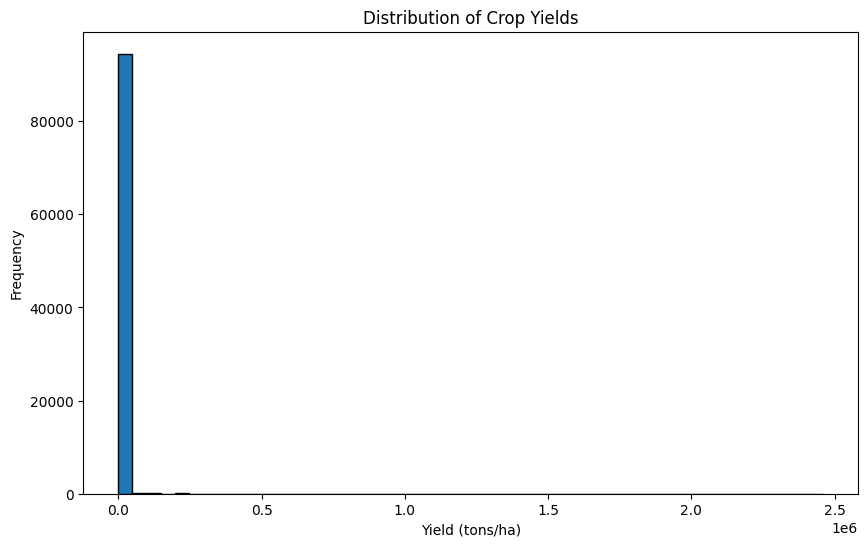

In [9]:
# Calculate yield per hectare
historical_perf['yield_per_ha'] = (
    historical_perf['Volume_Production'] / historical_perf['Area_Planted_Harvested']
)

# Remove invalid yields
historical_perf_clean = historical_perf[
    (historical_perf['yield_per_ha'].notna()) & 
    (historical_perf['yield_per_ha'] != float('inf')) &
    (historical_perf['yield_per_ha'] > 0)
].copy()

print(f"Valid yield records: {len(historical_perf_clean)}")
print(f"\nYield statistics (tons/ha):")
print(historical_perf_clean['yield_per_ha'].describe())

# Plot yield distribution
plt.figure(figsize=(10, 6))
plt.hist(historical_perf_clean['yield_per_ha'], bins=50, edgecolor='black')
plt.xlabel('Yield (tons/ha)')
plt.ylabel('Frequency')
plt.title('Distribution of Crop Yields')
plt.show()


## Deeper Dive into Yield Patterns

Let's explore the yield data more deeply to identify patterns and insights.

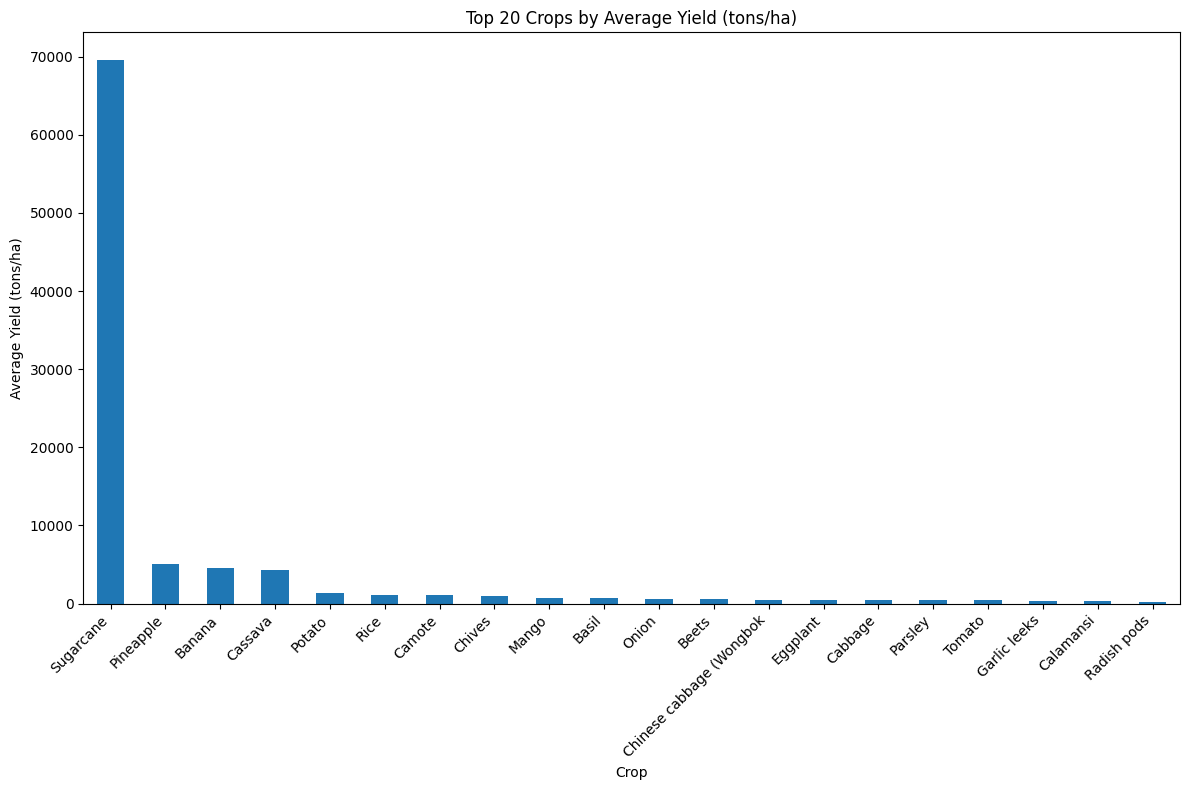

In [10]:
# Top 20 Crops by Average Yield
top_crops = historical_perf_clean.groupby('Crop')['yield_per_ha'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
top_crops.plot(kind='bar')
plt.title('Top 20 Crops by Average Yield (tons/ha)')
plt.xlabel('Crop')
plt.ylabel('Average Yield (tons/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

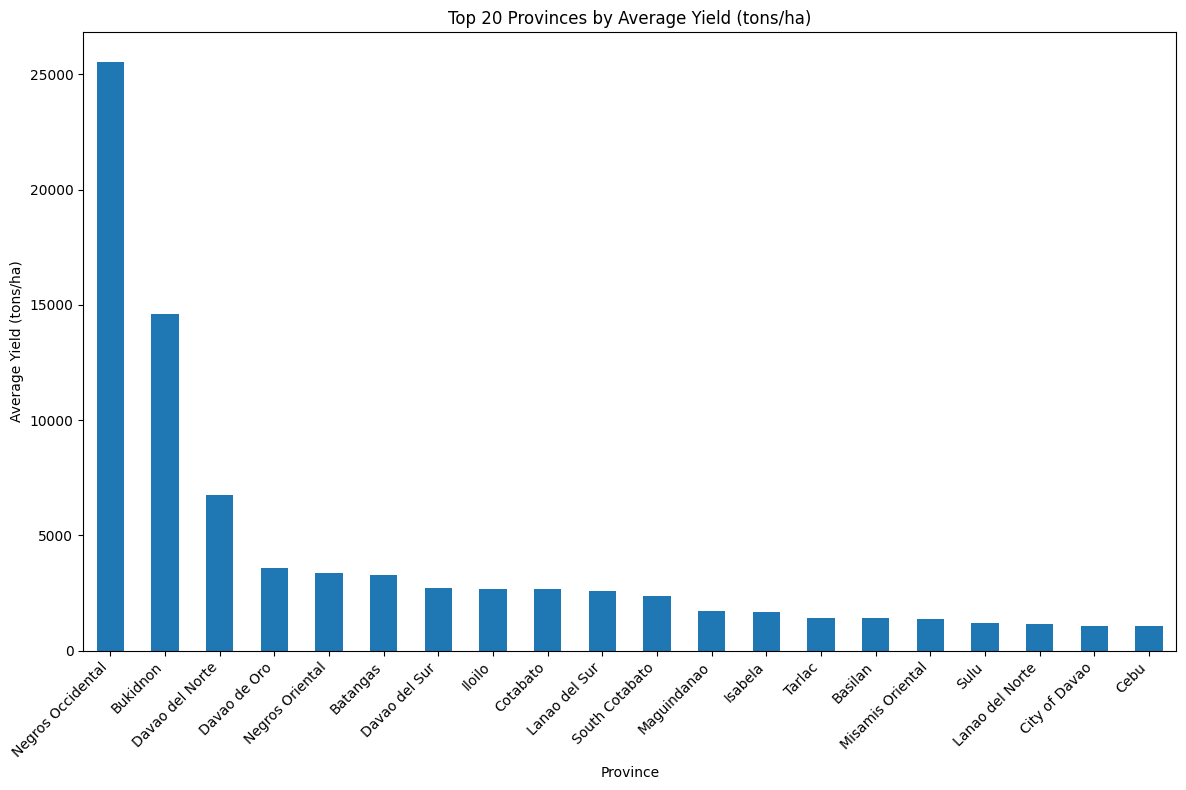

In [11]:
# Top 20 Provinces by Average Yield
top_provinces = historical_perf_clean.groupby('Province')['yield_per_ha'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
top_provinces.plot(kind='bar')
plt.title('Top 20 Provinces by Average Yield (tons/ha)')
plt.xlabel('Province')
plt.ylabel('Average Yield (tons/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

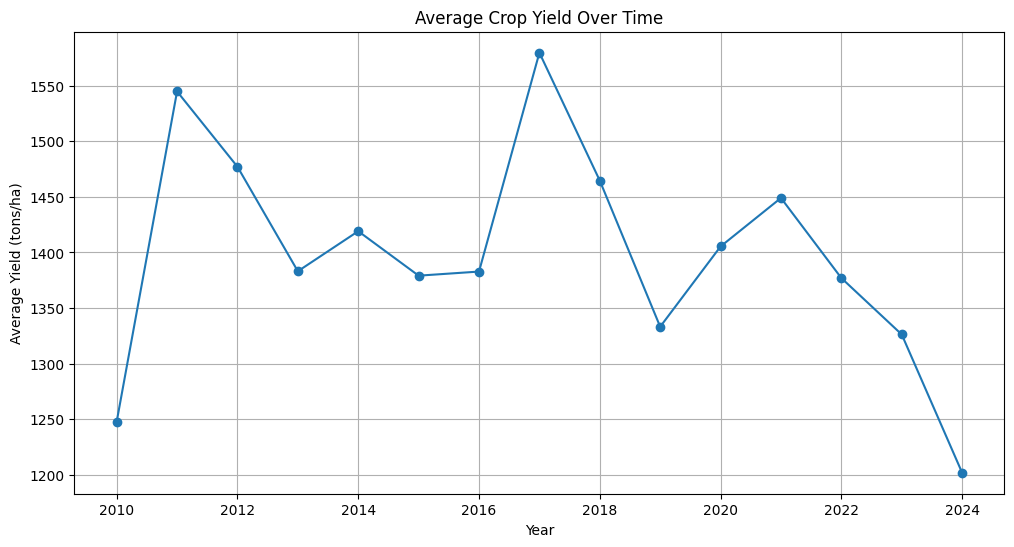

In [12]:
# Yield Trends Over Time
yield_over_time = historical_perf_clean.groupby('Year')['yield_per_ha'].mean()

plt.figure(figsize=(12, 6))
yield_over_time.plot(kind='line', marker='o')
plt.title('Average Crop Yield Over Time')
plt.xlabel('Year')
plt.ylabel('Average Yield (tons/ha)')
plt.grid(True)
plt.show()

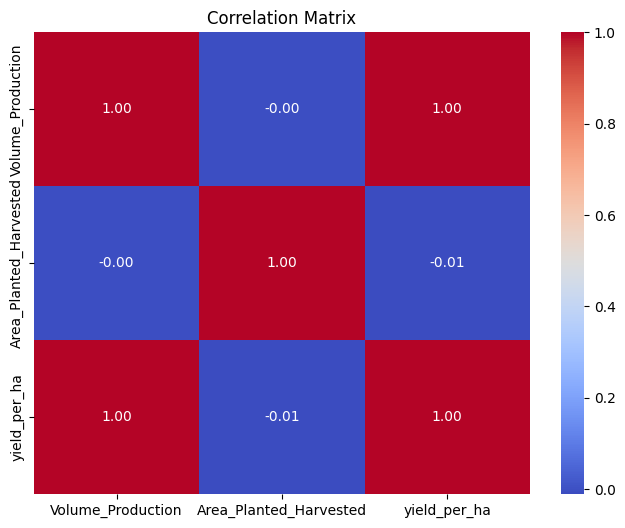

In [13]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = historical_perf_clean[['Volume_Production', 'Area_Planted_Harvested', 'yield_per_ha']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

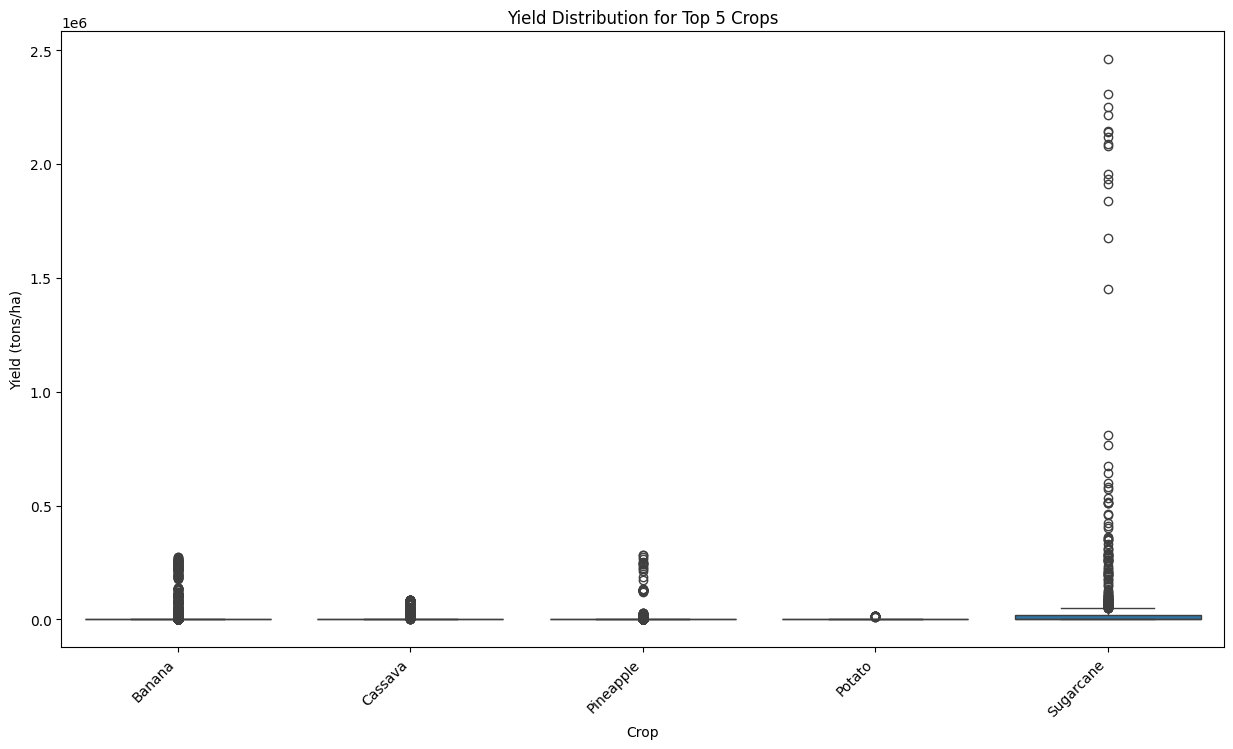

In [14]:
# Box Plots for Top 5 Crops
top_5_crops_list = top_crops.index[:5].tolist()
top_crops_df = historical_perf_clean[historical_perf_clean['Crop'].isin(top_5_crops_list)]

plt.figure(figsize=(15, 8))
sns.boxplot(x='Crop', y='yield_per_ha', data=top_crops_df)
plt.title('Yield Distribution for Top 5 Crops')
plt.xlabel('Crop')
plt.ylabel('Yield (tons/ha)')
plt.xticks(rotation=45, ha='right')
plt.show()

## Additional Data Visualizations

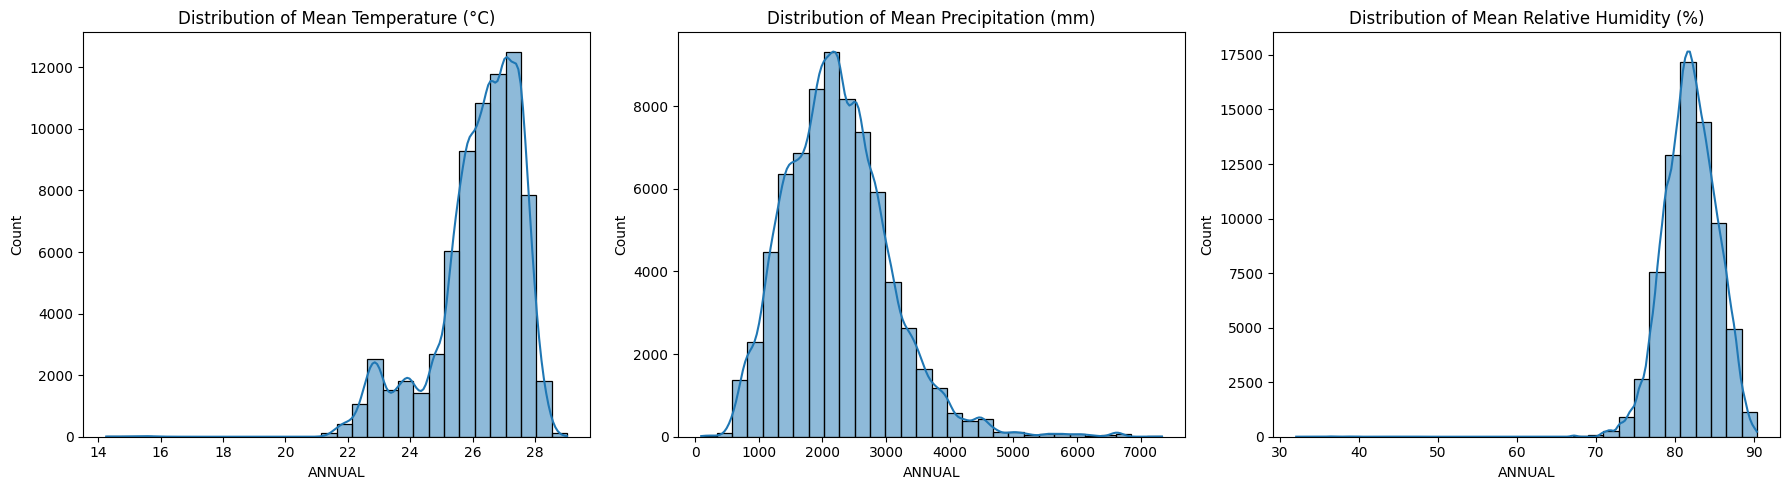

In [15]:
# Distribution of Climate Data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Mean Temperature (annual, PARAMETER == 'T2M')
sns.histplot(
	climate_df.loc[climate_df['PARAMETER'] == 'T2M', 'ANNUAL'],
	bins=30, ax=axes[0], kde=True
)
axes[0].set_title('Distribution of Mean Temperature (°C)')

# Mean Precipitation (annual, PARAMETER == 'PRECTOTCORR_SUM')
sns.histplot(
	climate_df.loc[climate_df['PARAMETER'] == 'PRECTOTCORR_SUM', 'ANNUAL'],
	bins=30, ax=axes[1], kde=True
)
axes[1].set_title('Distribution of Mean Precipitation (mm)')

# Mean Relative Humidity (annual, PARAMETER == 'RH2M')
sns.histplot(
	climate_df.loc[climate_df['PARAMETER'] == 'RH2M', 'ANNUAL'],
	bins=30, ax=axes[2], kde=True
)
axes[2].set_title('Distribution of Mean Relative Humidity (%)')

plt.tight_layout()
plt.show()

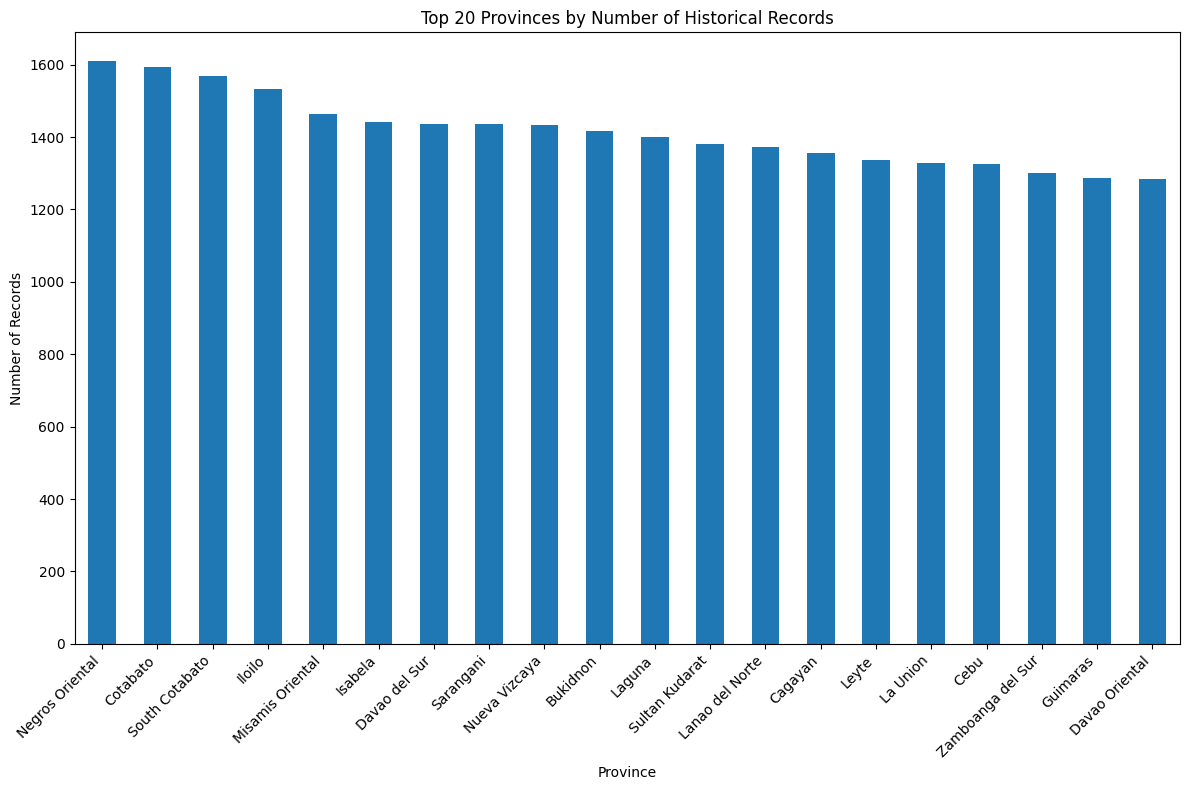

In [16]:
# Number of records per province
plt.figure(figsize=(12, 8))
province_counts = historical_perf_clean['Province'].value_counts().head(20)
province_counts.plot(kind='bar')
plt.title('Top 20 Provinces by Number of Historical Records')
plt.xlabel('Province')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

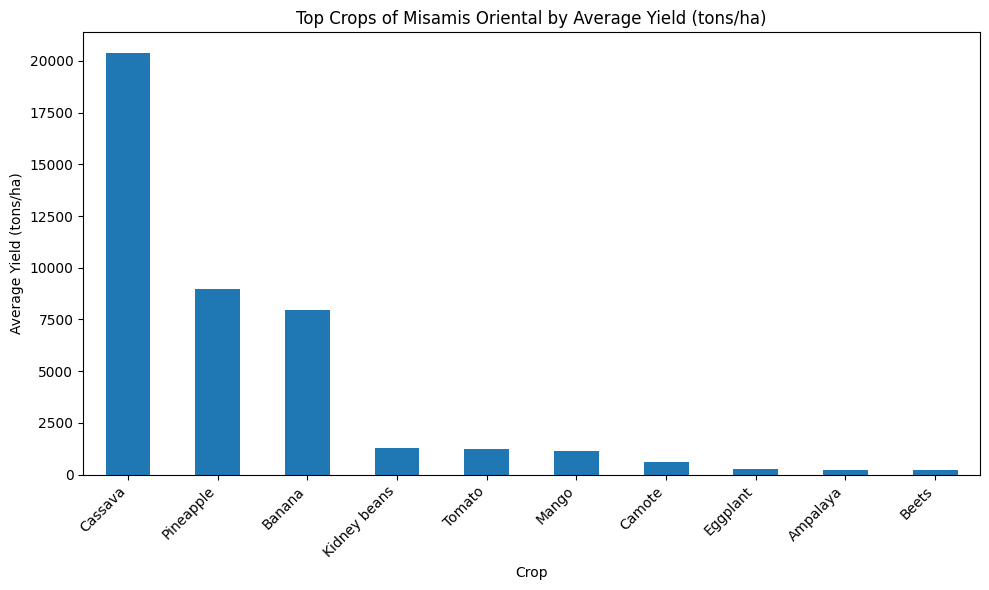

In [17]:
# Show top crops of Misamis Oriental by average yield
misamis_oriental_crops = (
    historical_perf_clean[historical_perf_clean['Province'].str.upper() == 'MISAMIS ORIENTAL']
    .groupby('Crop')['yield_per_ha']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
misamis_oriental_crops.plot(kind='bar')
plt.title('Top Crops of Misamis Oriental by Average Yield (tons/ha)')
plt.xlabel('Crop')
plt.ylabel('Average Yield (tons/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

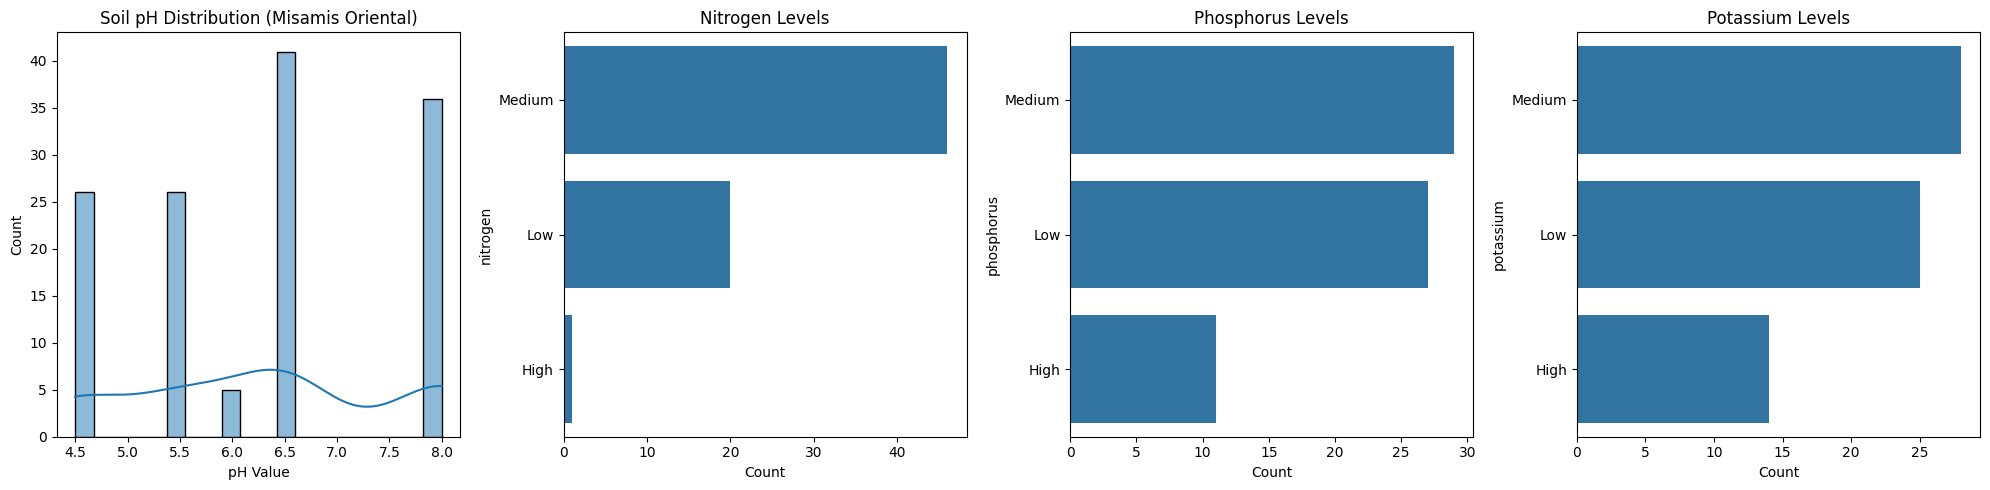

In [18]:
# Filter soil test data for Misamis Oriental
misamis_oriental_soil = soil_test_df[soil_test_df['province'].str.upper() == 'MISAMIS ORIENTAL']

# Plot distributions of pH, nitrogen, phosphorus, and potassium
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# pH distribution
sns.histplot(
    misamis_oriental_soil[['ph_min', 'ph_max']].stack(),
    bins=20, ax=axes[0], kde=True
)
axes[0].set_title('Soil pH Distribution (Misamis Oriental)')
axes[0].set_xlabel('pH Value')

# Nitrogen distribution
sns.countplot(
    y='nitrogen', data=misamis_oriental_soil, order=misamis_oriental_soil['nitrogen'].value_counts().index, ax=axes[1]
)
axes[1].set_title('Nitrogen Levels')
axes[1].set_xlabel('Count')

# Phosphorus distribution
sns.countplot(
    y='phosphorus', data=misamis_oriental_soil, order=misamis_oriental_soil['phosphorus'].value_counts().index, ax=axes[2]
)
axes[2].set_title('Phosphorus Levels')
axes[2].set_xlabel('Count')

# Potassium distribution
sns.countplot(
    y='potassium', data=misamis_oriental_soil, order=misamis_oriental_soil['potassium'].value_counts().index, ax=axes[3]
)
axes[3].set_title('Potassium Levels')
axes[3].set_xlabel('Count')

plt.tight_layout()
plt.show()